# Transformations


Given a random variable $Z$ with PDF $f_Z(z)$ and transformation $Y = g(Z)$, where $g$ is differentiable and strictly increasing, the PDF of Y is given by


\begin{equation*}
f_Y(y) = f_Z(z) \left|\frac{dz}{dy}\right| = f_Z(g^{-1}(y)) \left|\frac{d}{dy}g^{-1}(y)\right|
\end{equation*}

In the video, we have $y = g(z) = \mu + z^2$ which has two branches: $z > 0$ and $z < 0$. For the first branch we have:

\begin{equation*}
y = g(z) = \mu + z^2 \implies z = g^{-1}(y) = \sqrt{y - \mu} \implies \frac{dz}{dy} = \frac{1}{2\sqrt{y - \mu}}
\end{equation*}

and

\begin{equation*}
f_Z(z) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{z^2}{2\sigma^2}}
\end{equation*}

resulting in 

\begin{equation*}
f_Y(y) = \frac{1}{2\sigma\sqrt{2\pi (y - \mu)}} e^{-\frac{y - \mu}{2\sigma^2}} 

\end{equation*}
<br/>

The second branch has the same $\left|\frac{dz}{dy}\right|$ and $f_Z(z)$ resulting in the same pdf. Given that the transformation is a two-to-one mapping, the final pdf for $y$ becomes (see many-to-one transformations of random variables here https://www.stat.umn.edu/geyer/5101/notes/algo2.pdf)

\begin{equation*}
f_Y(y) = \frac{1}{\sigma\sqrt{2\pi (y - \mu)}} e^{-\frac{y - \mu}{2\sigma^2}} 

\end{equation*}
<br/>

Let's conform this empirically. 

In [1]:
import numpy as np
import utilityFuncs as uf
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
def pdf_expression(mean, std, x):
    return (1. / (1. * std * np.sqrt(2. * np.pi * (x - mean)))) * np.exp(-(x - mean) / (2. * std ** 2.))

In [8]:
SIGMA = 0.8
MU = 1

In [9]:
Z = np.random.normal(0, SIGMA, size=10000)
Y = MU + Z**2

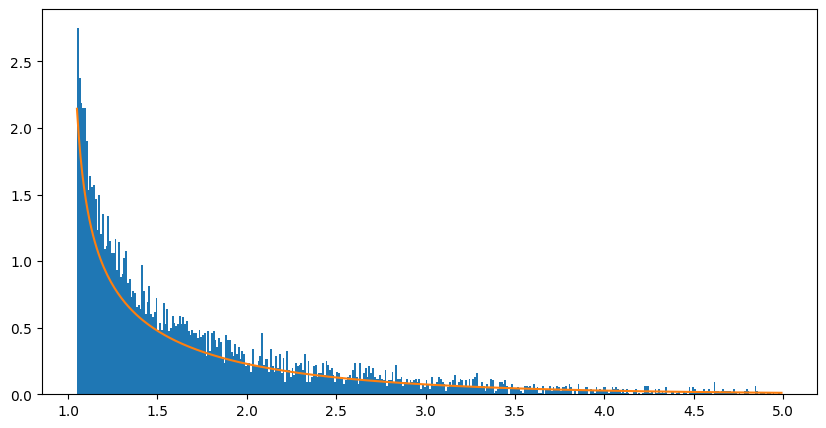

In [10]:
bins = np.arange(1.05, 5, 0.01)
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.hist(Y, density=True, bins=bins)
pdf_values = pdf_expression(MU, SIGMA, bins)
axes.plot(bins, pdf_values)